# Importing libraries and dataset

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.examples.tutorials.mnist import input_data


In [4]:
mnist = input_data.read_data_sets('MNIST_data/')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


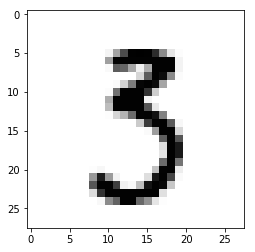

In [117]:
plt.imshow(mnist.train.images[2].reshape(28,28),cmap= 'Greys')

# Creating the generator and discriminator functions

In [6]:
def generator(z,reuse=None):
    with tf.variable_scope('gen',reuse=reuse):
        hidden1 = tf.layers.dense(inputs=z,units=128)
        # Leaky Relu
        alpha = 0.01
        hidden1 = tf.maximum(alpha*hidden1,hidden1)
        hidden2 = tf.layers.dense(inputs=hidden1,units=128)
        #Leaky ReLU
        hidden2 = tf.maximum(alpha*hidden2,hidden2)
        output = tf.layers.dense(hidden2,units=784,activation=tf.nn.tanh)
        return output
        
def discriminator(X,reuse=None):
    with tf.variable_scope('dis',reuse=reuse):
        hidden1 = tf.layers.dense(inputs=X,units=128)
        # Leaky Relu
        alpha = 0.01
        hidden1 = tf.maximum(alpha*hidden1,hidden1)
        hidden2 = tf.layers.dense(inputs=hidden1,units=128)
        hidden2 = tf.maximum(alpha*hidden2,hidden2)
        
        #Return values for loss function
        logits = tf.layers.dense(hidden2,units=1)
        output = tf.sigmoid(logits)
    
        return output, logits
        
        

In [7]:
#Reseting current graph
tf.reset_default_graph()

In [8]:
#Placeholders for real images and noise
real = tf.placeholder(tf.float32,shape=[None,784])
z = tf.placeholder(tf.float32,shape = [None, 100]) #100 random points for noise

In [9]:
G = generator(z) #Output generated images
#Making 2 descriminator: first on the real images to understand the dataset; Second for acting on generator
D_output_real, D_logits_real = discriminator(real)
#Reuse = True uses the previously trained 'des' descriminator for genrated images
D_output_fake, D_logits_fake = discriminator(G,reuse=True) 

In [10]:
#Losses
def loss_function(logits_in,labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in,labels=labels_in))

In [11]:
#0.9 is to smoothing 
#Ones like detects the shape of the tensor automatically
D_real_loss = loss_function(D_logits_real,tf.ones_like(D_logits_real)*0.9) #True for all the images in the real dataset
D_fake_loss = loss_function(D_logits_fake,tf.zeros_like(D_logits_fake))#False for all the images in the generated dataset


In [12]:
D_loss = D_real_loss+D_fake_loss #Final loss to minimize

In [13]:
#Descriminator must return p->1 for the generated image
G_loss = loss_function(D_logits_fake,tf.ones_like(D_logits_fake))

In [14]:
lr = 0.001
tvars = tf.trainable_variables() #Gets all the variables from the network
d_vars = [var for var in tvars if 'dis' in var.name] 
g_vars = [var for var in tvars if 'gen' in var.name]

D_trainer = tf.train.AdamOptimizer(lr).minimize(D_loss, var_list=d_vars)
G_trainer = tf.train.AdamOptimizer(lr).minimize(G_loss, var_list=g_vars)

In [45]:
#Training session
batch_size = 100
epochs = 500
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [46]:
samples = [] #Example of produced images

In [47]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        num_batches = mnist.train.num_examples// batch_size
        for i in range(num_batches):
            #Creating batch of real images
            batch = mnist.train.next_batch(batch_size)
            batch_images = batch[0].reshape((batch_size,784))
            batch_images = batch_images*2-1 
            #Creating noise
            batch_z = np.random.uniform(-1,1,size=(batch_size,100)) #For tanh function
            #Training the model
            _  = sess.run(D_trainer, feed_dict = {real: batch_images,z:batch_z})
            _  = sess.run(G_trainer,feed_dict={z:batch_z})
            
        print("ON EPOCH {}".format(epoch))
        #Extracting a sample form the traning epoch
        sample_z = np.random.uniform(-1,1,size=(1,100))
        gen_sample = sess.run(generator(z,reuse=True),feed_dict={z:sample_z})
        samples.append(gen_sample)
        #Saving the model
        saver.save(sess,save_path="./model/gan_model")

ON EPOCH 0
ON EPOCH 1
ON EPOCH 2
ON EPOCH 3
ON EPOCH 4
ON EPOCH 5
ON EPOCH 6
ON EPOCH 7
ON EPOCH 8
ON EPOCH 9
ON EPOCH 10
ON EPOCH 11
ON EPOCH 12
ON EPOCH 13
ON EPOCH 14
ON EPOCH 15
ON EPOCH 16
ON EPOCH 17
ON EPOCH 18
ON EPOCH 19
ON EPOCH 20
ON EPOCH 21
ON EPOCH 22
ON EPOCH 23
ON EPOCH 24
ON EPOCH 25
ON EPOCH 26
ON EPOCH 27
ON EPOCH 28
ON EPOCH 29
ON EPOCH 30
ON EPOCH 31
ON EPOCH 32
ON EPOCH 33
ON EPOCH 34
ON EPOCH 35
ON EPOCH 36
ON EPOCH 37
ON EPOCH 38
ON EPOCH 39
ON EPOCH 40
ON EPOCH 41
ON EPOCH 42
ON EPOCH 43
ON EPOCH 44
ON EPOCH 45
ON EPOCH 46
ON EPOCH 47
ON EPOCH 48
ON EPOCH 49
ON EPOCH 50
ON EPOCH 51
ON EPOCH 52
ON EPOCH 53
ON EPOCH 54
ON EPOCH 55
ON EPOCH 56
ON EPOCH 57
ON EPOCH 58
ON EPOCH 59
ON EPOCH 60
ON EPOCH 61
ON EPOCH 62
ON EPOCH 63
ON EPOCH 64
ON EPOCH 65
ON EPOCH 66
ON EPOCH 67
ON EPOCH 68
ON EPOCH 69
ON EPOCH 70
ON EPOCH 71
ON EPOCH 72
ON EPOCH 73
ON EPOCH 74
ON EPOCH 75
ON EPOCH 76
ON EPOCH 77
ON EPOCH 78
ON EPOCH 79
ON EPOCH 80
ON EPOCH 81
ON EPOCH 82
ON EPOCH 83
ON

# Testing the model

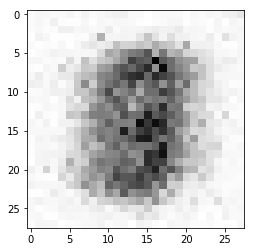

In [113]:
#After first 10 epochs
plt.imshow(samples[10].reshape(28,28),cmap= 'Greys')

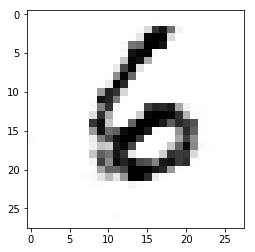

In [116]:
#After 490+ epochs
plt.imshow(samples[497].reshape(28,28),cmap= 'Greys')

In [81]:
saver = tf.train.Saver(var_list=g_vars)
new_samples = []
with tf.Session() as sess:
    #Restoring the saved model
    saver.restore(sess,"./model/gan_model")
    #Generating 100 random samples
    for x in range(100):
        sample_z = np.random.uniform(-1,1,size=(1,100))
        gen_sample = sess.run(generator(z,reuse=True),feed_dict={z:sample_z})
        new_samples.append(gen_sample)

INFO:tensorflow:Restoring parameters from ./model/gan_model


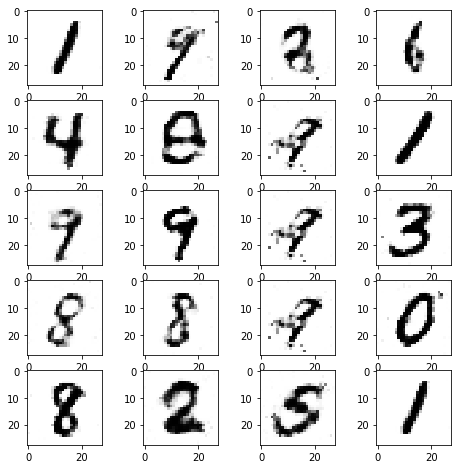

In [111]:
#Creating graph
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for l in range(1, columns*rows +1):
    #Selecting a random index
    ind = int(np.random.randint(low= 0,high =100))
    fig.add_subplot(rows, columns, l)
    #Adding the figure to graph
    plt.imshow(new_samples[ind].reshape(28,28),cmap= 'Greys')
#Showing the graph
plt.show()